# Hyperbolic Orbit
## Given:
The WMAP spacecraft which has a $v_{\infty} = 1.004$ km/s and altitude from moon surface of 2000 km.

## Find:
a) Find the orbital paramenters $p$, $a$, $e$, $h$, $\epsilon$, $\delta$, and $\theta^*_{\infty}$.

b) Distance to moon? Location $r$, $v$, $\gamma$, and $\theta^*$. Plot and add angles $\delta$ and $\theta^*_{\infty}$.

c) Velocity at periapsis.

In [1]:
# Import Functions and basic info
import sys
sys.path.append('../')
from Functions.Universe import Solar_S as SS
from Functions import Keplarian_fnc as kp
import numpy as np
import matplotlib.pyplot as plt


In [2]:
v_inf = 1.004
miu = SS.loc['Moon', 'miu']
rp = SS.loc['Moon', 'r'] + 2000

### Part a)

In [16]:
Eps = kp.Eps_vinf(v_inf)
a = kp.a_miu_Eps(miu, Eps)
e = kp.e_rp_a(rp, a)
p = kp.p_a_e(a, e)
h = kp.h_miu_p(miu, p)

delta = kp.delta.delta_e(e)
thst_inf = kp.thst_inf.thst_inf_e(e)
alpha_hyp = thst_inf - delta


### Part b)

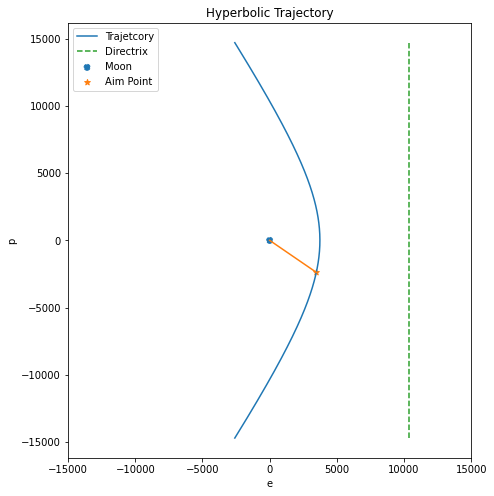

In [30]:
b = np.sin(alpha_hyp.rad)*(np.abs(a) + rp)
thst_aim = alpha_hyp - kp.angle.degree(90) 

r_aim = kp.distance.keplar_r(p, e, thst_aim.rad)
v_mag = kp.velocity.v_a_miu_r(a, miu, r_aim.mag)
gamma_aim = kp.gamma.gamma_h_r_v_thst(h, r_aim.mag, v_mag, thst_aim.rad)
v_aim = kp.velocity.v_gamma(v_mag, gamma_aim.rad, thst_aim.rad)

thst = kp.angle.degree(np.linspace(-100,100,500))
r = kp.distance.keplar_r(p, e, thst.rad)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(r.per[:,0], r.per[:,1], label='Trajetcory')
ax.scatter(0, 0, ls = '--', label='Moon')
ax.scatter(r_aim.per[0], r_aim.per[1], marker='*', label='Aim Point')
ax.plot([0,r_aim.per[0]], [0, r_aim.per[1]])
ax.plot([p,p], r.per[[0,-1],1], ls = '--', label='Directrix')
ax.set_aspect('equal', 'box')
ax.set_xlabel('e')
ax.set_ylabel('p')
ax.set_title('Hyperbolic Trajectory')
ax.set_xlim([-15000, 15000])
ax.legend()

### Part c)

In [36]:
v_per = kp.velocity.v_a_miu_r(a, miu, rp)
v_c = np.sqrt(miu/rp)

print('The velocity of the hyperbolic orbit at the periapsis is (km/s):', round(v_per,4))
print('The velocity of a circular orbit is (km/s):', round(v_c,4))

The velocity of the hyperbolic orbit at the periapsis is (km/s): 1.9056
The velocity of a circular orbit is (km/s): 1.1453
